In [1]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# Load the dataset
from google.colab import files
uploaded = files.upload()


Saving Iris.csv to Iris.csv


In [3]:
# Read the uploaded file
df = pd.read_csv(next(iter(uploaded)))

In [4]:
# Display basic dataset info
print("Dataset Shape:", df.shape)
print("Number of Columns:", len(df.columns))
print("\nDataset Info:")
print(df.info())
print("\nSummary Statistics:")
print(df.describe())

Dataset Shape: (150, 6)
Number of Columns: 6

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Id           150 non-null    int64  
 1   SepalLength  150 non-null    float64
 2   SepalWidth   150 non-null    float64
 3   PetalLength  150 non-null    float64
 4   PetalWidth   150 non-null    float64
 5   Species      150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB
None

Summary Statistics:
               Id  SepalLength  SepalWidth  PetalLength  PetalWidth
count  150.000000   150.000000  150.000000   150.000000  150.000000
mean    75.500000     5.843333    3.054000     3.758667    1.198667
std     43.445368     0.828066    0.433594     1.764420    0.763161
min      1.000000     4.300000    2.000000     1.000000    0.100000
25%     38.250000     5.100000    2.800000     1.600000    0.300000
50% 

In [5]:
# Check for null values
print("\nNull Values:")
print(df.isnull().sum())

# Find unique values
print("\nUnique Values:")
print(df.nunique())


Null Values:
Id             0
SepalLength    0
SepalWidth     0
PetalLength    0
PetalWidth     0
Species        0
dtype: int64

Unique Values:
Id             150
SepalLength     35
SepalWidth      23
PetalLength     43
PetalWidth      22
Species          3
dtype: int64


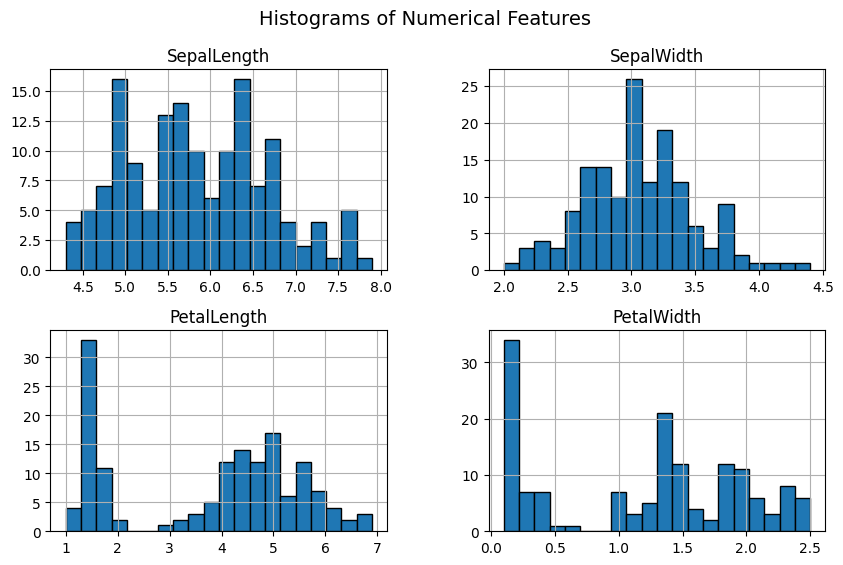

In [6]:
# Drop 'Id' column if present
df = df.drop(columns=['Id'], errors='ignore')

# Plot histograms
df.hist(figsize=(10, 6), bins=20, edgecolor="black")
plt.suptitle("Histograms of Numerical Features", fontsize=14)
plt.show()

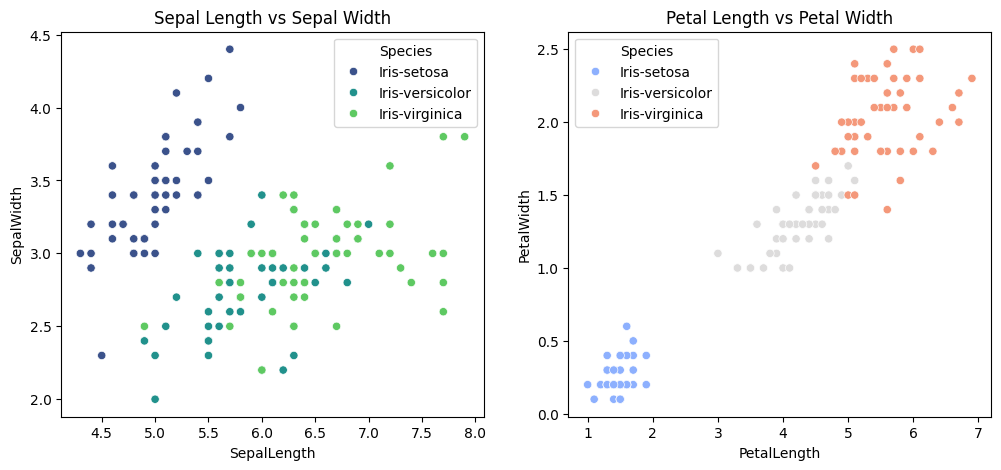

In [7]:
# Scatterplots
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.scatterplot(data=df, x="SepalLength", y="SepalWidth", hue="Species", palette="viridis")
plt.title("Sepal Length vs Sepal Width")

plt.subplot(1, 2, 2)
sns.scatterplot(data=df, x="PetalLength", y="PetalWidth", hue="Species", palette="coolwarm")
plt.title("Petal Length vs Petal Width")
plt.show()


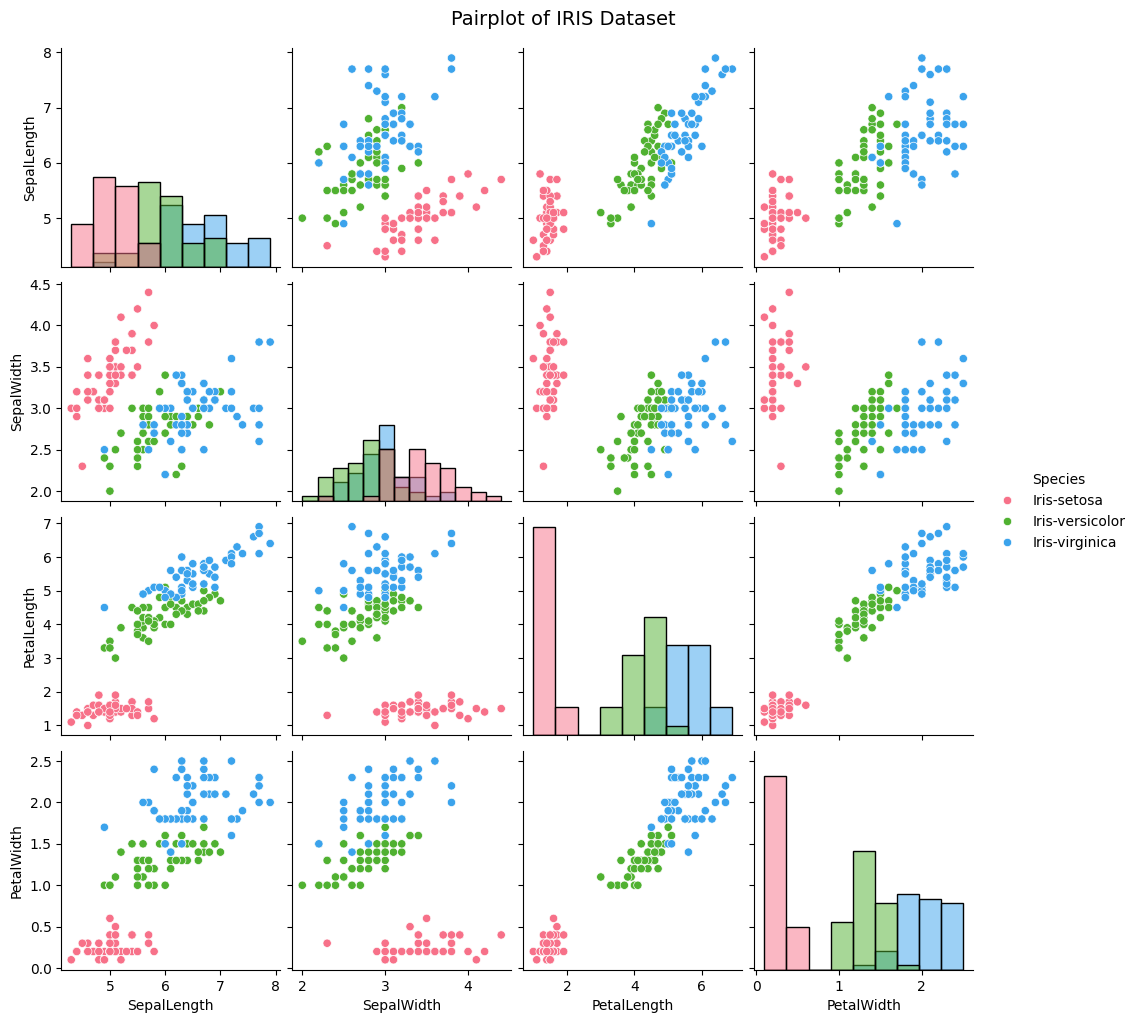

In [8]:
# Pairplot
sns.pairplot(df, hue="Species", diag_kind="hist", palette="husl")
plt.suptitle("Pairplot of IRIS Dataset", fontsize=14, y=1.02)
plt.show()

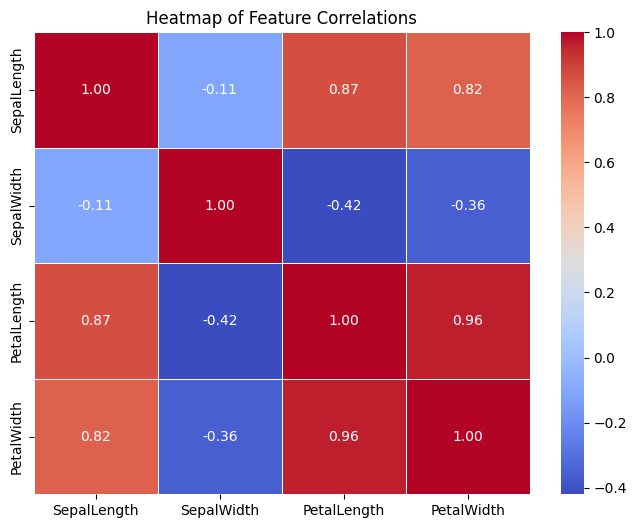

In [10]:
# Correlation Heatmap
plt.figure(figsize=(8, 6))
# Select only numeric columns for correlation calculation
numeric_df = df.select_dtypes(include=['number'])
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Heatmap of Feature Correlations")
plt.show()

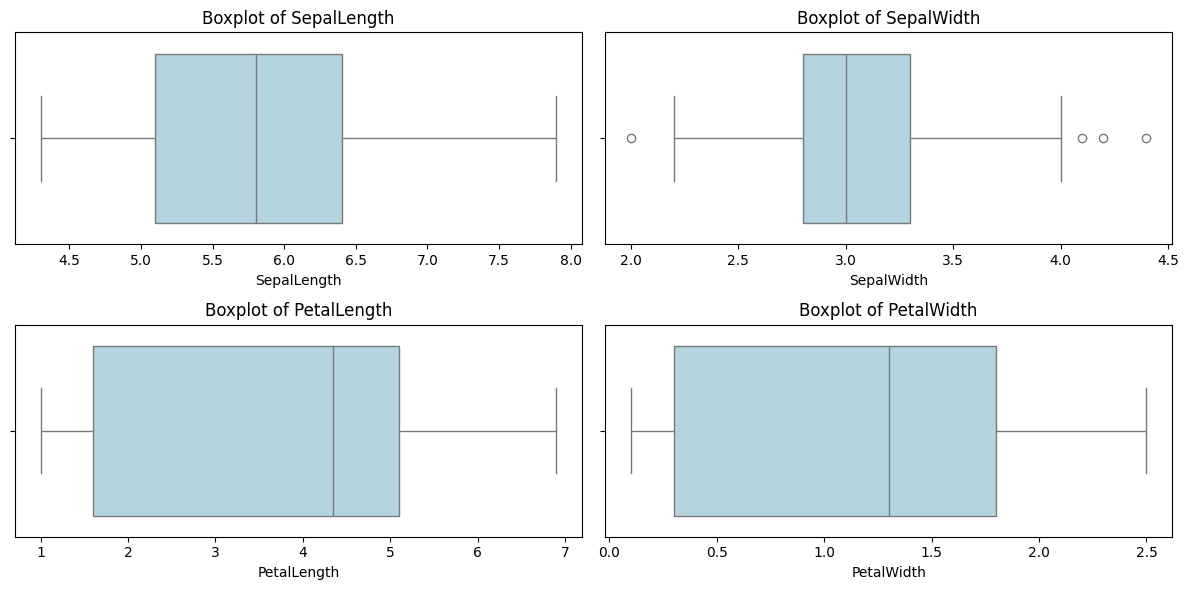

In [11]:
# Boxplots for outlier detection
plt.figure(figsize=(12, 6))
for i, col in enumerate(df.select_dtypes(include=['number']).columns, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(x=df[col], color="lightblue")
    plt.title(f"Boxplot of {col}")
plt.tight_layout()
plt.show()

In [17]:
# Handling Outliers using IQR
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Apply outlier removal
df_cleaned = df.copy()
for col in df.select_dtypes(include=['number']).columns:
    df_cleaned = remove_outliers(df_cleaned, col)

# Display shape before and after outlier removal
print("\nOriginal Shape:", df.shape)
print("Cleaned Shape:", df_cleaned.shape)



Original Shape: (150, 5)
Cleaned Shape: (146, 5)
